In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Importing and Exploring Data :

In [2]:
data_train = pd.read_csv('loan_train.csv')
data_test = pd.read_csv('loan_test.csv')

In [3]:
data_train.shape

(614, 13)

In [4]:
data_test.shape

(367, 12)

In [5]:
data_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data_train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
data_test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [8]:
data_train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
data_test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

We will append both dataset

In [10]:
def get_combined_data():
    train = pd.read_csv('loan_train.csv')
    test = pd.read_csv('loan_test.csv')
    train.drop('Loan_Status', 1, inplace=True)
    combined = train.append(test)
    combined.reset_index(inplace=True,drop = True)
    combined.drop(['Loan_ID'], inplace=True, axis=1)
    return combined

In [11]:
combined = get_combined_data()
combined.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [12]:
combined.isnull().sum()

Gender               24
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [13]:
data_train['Gender'].value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [14]:
data_train.Gender.dtypes

dtype('O')

In [15]:
data_test['Gender'].value_counts()

Male      286
Female     70
Name: Gender, dtype: int64

In [16]:
def impute_gender():
    combined['Gender'].fillna('Male', inplace=True)
impute_gender()

In [17]:
combined.isnull().sum()

Gender                0
Married               3
Dependents           25
Education             0
Self_Employed        55
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [18]:
combined['Married'].value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [19]:
combined['Self_Employed'].value_counts()

No     807
Yes    119
Name: Self_Employed, dtype: int64

In [20]:
def impute_martial_status():
    combined['Married'].fillna('Yes', inplace=True)
impute_martial_status()

def impute_employment():
    combined['Self_Employed'].fillna('No', inplace=True)
impute_employment()

In [21]:
combined.isnull().sum()

Gender                0
Married               0
Dependents           25
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           27
Loan_Amount_Term     20
Credit_History       79
Property_Area         0
dtype: int64

In [22]:
combined['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [23]:
def impute_credit_history():
    combined['Credit_History'].fillna(1, inplace=True)
def impute_loan_amount():
    combined['LoanAmount'].fillna(combined['LoanAmount'].median(), inplace=True)
    
impute_credit_history()
impute_loan_amount()

In [24]:
combined['Dependents'].value_counts()

0     545
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [25]:
def impute_dependents():
    combined['Dependents'].fillna('0', inplace=True)
impute_dependents()

def impute_loan_amount_term():
    combined['Loan_Amount_Term'].fillna(combined['Loan_Amount_Term'].median(), inplace=True)
impute_loan_amount_term()  

In [26]:
combined.Dependents.value_counts()

0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [27]:
combined.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [28]:
combined.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [29]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


ENCODING

In [30]:
def process_gender():
    combined['Gender'] = combined['Gender'].map({'Male':1,'Female':0})
process_gender()

In [31]:
combined.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,No,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban
1,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban


In [33]:
combined.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
976,1,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban
977,1,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban
978,1,No,0,Graduate,No,3250,1993.0,126.0,360.0,1.0,Semiurban
979,1,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural
980,1,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural


In [32]:
combined['Gender'].value_counts()

1    799
0    182
Name: Gender, dtype: int64

In [34]:
def process_marital_status():
    combined['Married'] = combined['Married'].map({'Yes':1,'No':0})
process_marital_status()

In [35]:
combined.Dependents.value_counts()

0     570
2     160
1     160
3+     91
Name: Dependents, dtype: int64

In [36]:
def process_dependents():
#     combined['No_Dependents'] = combined['Dependents'].map(lambda d: 1 if d=='0' else 0)
    combined['Singleton'] = combined['Dependents'].map(lambda d: 1 if d=='1' else 0)
    combined['Small_Family'] = combined['Dependents'].map(lambda d: 1 if d=='2' else 0)
    combined['Large_Family'] = combined['Dependents'].map(lambda d: 1 if d=='3+' else 0)
    combined.drop(['Dependents'], axis=1, inplace=True)
process_dependents()

In [37]:
combined.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Singleton,Small_Family,Large_Family
0,1,0,Graduate,No,5849,0.0,126.0,360.0,1.0,Urban,0,0,0
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1,0,0
2,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0,0,0
3,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0,0,0
4,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0,0,0


In [38]:
combined.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [39]:
 pd.get_dummies(combined['Property_Area'], prefix='Property').head(2)

,Property_Rural,Property_Semiurban,Property_Urban
0,0,0,1
1,1,0,0


In [41]:
def process_property():
    global combined
    property_dummies = pd.get_dummies(combined['Property_Area'], prefix='Property')
    combined = pd.concat([combined, property_dummies], axis=1)
    combined.drop('Property_Area', axis=1, inplace=True)
process_property()

In [42]:
combined.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban
0,1,0,Graduate,No,5849,0.0,126.0,360.0,1.0,0,0,0,0,0,1
1,1,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,1,0,0,1,0,0
2,1,1,Graduate,Yes,3000,0.0,66.0,360.0,1.0,0,0,0,0,0,1
3,1,1,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,0,0,0,0,0,1
4,1,0,Graduate,No,6000,0.0,141.0,360.0,1.0,0,0,0,0,0,1


In [43]:
def process_education():
    combined['Education'] = combined['Education'].map({'Graduate':1,'Not Graduate':0})
process_education()

In [44]:
def process_employment():
    combined['Self_Employed'] = combined['Self_Employed'].map({'Yes':1,'No':0})
process_employment()

In [45]:
combined.Credit_History.value_counts()

1.0    833
0.0    148
Name: Credit_History, dtype: int64

In [46]:
def process_credit_history():
    combined['Credit_History_Bad'] = combined['Credit_History'].map(lambda c: 1 if c==0 else 0)
    combined['Credit_History_Good'] = combined['Credit_History'].map(lambda c: 1 if c==1 else 0)
    combined.drop('Credit_History', axis=1, inplace=True)
process_credit_history()

In [47]:
combined.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban,Credit_History_Bad,Credit_History_Good
0,1,0,1,0,5849,0.0,126.0,360.0,0,0,0,0,0,1,0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1,0,0,1,0,0,0,1
2,1,1,1,1,3000,0.0,66.0,360.0,0,0,0,0,0,1,0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,0,0,0,0,0,1,0,1
4,1,0,1,0,6000,0.0,141.0,360.0,0,0,0,0,0,1,0,1


FEATURE ENGINEERING

In [48]:
def process_income():
    combined['Total_Income'] = combined['ApplicantIncome'] + combined['CoapplicantIncome']
    combined.drop(['ApplicantIncome','CoapplicantIncome'], axis=1, inplace=True)
process_income()

In [49]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban,Credit_History_Bad,Credit_History_Good,Total_Income
0,1,0,1,0,126.0,360.0,0,0,0,0,0,1,0,1,5849.0
1,1,1,1,0,128.0,360.0,1,0,0,1,0,0,0,1,6091.0
2,1,1,1,1,66.0,360.0,0,0,0,0,0,1,0,1,3000.0
3,1,1,0,0,120.0,360.0,0,0,0,0,0,1,0,1,4941.0
4,1,0,1,0,141.0,360.0,0,0,0,0,0,1,0,1,6000.0


In [50]:
def process_loan_amount():
    combined['Debt_Income_Ratio'] = combined['Total_Income'] / combined['LoanAmount']
process_loan_amount()

In [51]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban,Credit_History_Bad,Credit_History_Good,Total_Income,Debt_Income_Ratio
0,1,0,1,0,126.0,360.0,0,0,0,0,0,1,0,1,5849.0,46.420635
1,1,1,1,0,128.0,360.0,1,0,0,1,0,0,0,1,6091.0,47.585938
2,1,1,1,1,66.0,360.0,0,0,0,0,0,1,0,1,3000.0,45.454545
3,1,1,0,0,120.0,360.0,0,0,0,0,0,1,0,1,4941.0,41.175000
4,1,0,1,0,141.0,360.0,0,0,0,0,0,1,0,1,6000.0,42.553191


In [52]:
combined['Loan_Amount_Term'].value_counts()

360.0    843
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [63]:
def process_loan_term():
    combined['Very_Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
    combined['Short_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
    combined['Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
    combined['Very_Long_Term'] = combined['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
    combined.drop('Loan_Amount_Term', axis=1, inplace=True)
process_loan_term()

In [64]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban,Credit_History_Bad,Credit_History_Good,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,0,1,0,126.0,0,0,0,0,0,1,0,1,5849.0,46.420635,0,0,0,1
1,1,1,1,0,128.0,1,0,0,1,0,0,0,1,6091.0,47.585938,0,0,0,1
2,1,1,1,1,66.0,0,0,0,0,0,1,0,1,3000.0,45.454545,0,0,0,1
3,1,1,0,0,120.0,0,0,0,0,0,1,0,1,4941.0,41.175000,0,0,0,1
4,1,0,1,0,141.0,0,0,0,0,0,1,0,1,6000.0,42.553191,0,0,0,1


In [65]:
combined[60:70]

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban,Credit_History_Bad,Credit_History_Good,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
60,1,1,1,0,120.0,0,0,0,0,0,1,0,1,6296.0,52.466667,0,0,0,1
61,1,1,1,0,99.0,0,0,1,0,0,1,0,1,3029.0,30.595960,0,0,0,1
62,1,1,0,1,165.0,0,0,0,1,0,0,1,0,6058.0,36.715152,0,0,1,0
63,1,1,1,0,126.0,1,0,0,1,0,0,1,0,4945.0,39.246032,0,0,0,1
64,0,0,1,0,116.0,0,0,0,0,1,0,1,0,4166.0,35.913793,0,0,0,1
65,1,1,1,0,258.0,0,0,0,0,1,0,0,1,10321.0,40.003876,0,0,0,1
66,1,0,0,0,126.0,0,0,0,0,0,1,1,0,5454.0,43.285714,0,0,1,0
67,1,1,1,0,312.0,1,0,0,0,0,1,0,1,10750.0,34.455128,0,0,0,1
68,1,1,0,1,125.0,0,0,1,0,0,1,0,1,7100.0,56.800000,1,0,0,0
69,0,0,1,0,136.0,0,0,0,0,1,0,1,0,4300.0,31.617647,0,0,0,1


In [66]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
combined[['LoanAmount','Total_Income','Debt_Income_Ratio']] = scalar.fit_transform(combined[['LoanAmount',
                                                                                'Total_Income','Debt_Income_Ratio']])

In [67]:
combined.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Singleton,Small_Family,Large_Family,Property_Rural,Property_Semiurban,Property_Urban,Credit_History_Bad,Credit_History_Good,Total_Income,Debt_Income_Ratio,Very_Short_Term,Short_Term,Long_Term,Very_Long_Term
0,1,0,1,0,-0.210291,0,0,0,0,0,1,0,1,-0.154913,-0.112887,0,0,0,1
1,1,1,1,0,-0.184098,1,0,0,1,0,0,0,1,-0.114719,-0.081600,0,0,0,1
2,1,1,1,1,-0.996077,0,0,0,0,0,1,0,1,-0.628099,-0.138826,0,0,0,1
3,1,1,0,0,-0.288869,0,0,0,0,0,1,0,1,-0.305721,-0.253728,0,0,0,1
4,1,0,1,0,-0.013844,0,0,0,0,0,1,0,1,-0.129833,-0.216725,0,0,0,1


In [68]:
combined.shape

(981, 19)

In [70]:
def recover_train_test_target():
    targets = data_train['Loan_Status'].map({'Y':1,'N':0})
    train = combined.head(614)
    test = combined.iloc[614:]
    return train, test, targets

In [71]:
train, test, ytrain = recover_train_test_target()

In [72]:
print (train.shape)
print (test.shape)
print (ytrain.shape)

(614, 19)
(367, 19)
(614,)


In [73]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(max_depth = 10, min_samples_leaf = 5, max_features = 'sqrt')
model.fit(train, ytrain)
predicted_train = model.predict(train)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 84.53%


In [74]:
model = DecisionTreeClassifier(max_depth = 20, min_samples_leaf = 5, max_features = 'sqrt')
model.fit(train, ytrain)
predicted_train = model.predict(train)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 83.39%


In [75]:
model = DecisionTreeClassifier(max_depth = 25, min_samples_leaf = 3, max_features = 'sqrt')
model.fit(train, ytrain)
predicted_train = model.predict(train)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 86.64%


In [76]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.76      0.78       192
           1       0.89      0.91      0.90       422

    accuracy                           0.87       614
   macro avg       0.85      0.84      0.84       614
weighted avg       0.86      0.87      0.87       614

Confusion matrix
[[146  46]
 [ 36 386]]


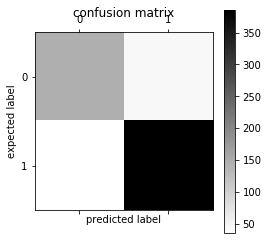

In [77]:
import matplotlib.pyplot as plt
plt.matshow(confusion_matrix(true_value,predicted_train), cmap=plt.cm.binary, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('expected label')
plt.xlabel('predicted label')
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth = 10, min_samples_leaf = 5,n_estimators = 100)
model.fit(train, ytrain)
predicted_train = model.predict(train)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 83.88%


In [79]:
from sklearn.metrics import confusion_matrix,classification_report
print("Classification Report")
print (classification_report(true_value,predicted_train))
print ("Confusion matrix")
print (confusion_matrix(true_value,predicted_train))

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.53      0.67       192
           1       0.82      0.98      0.89       422

    accuracy                           0.84       614
   macro avg       0.87      0.75      0.78       614
weighted avg       0.85      0.84      0.82       614

Confusion matrix
[[101  91]
 [  8 414]]


In [80]:
features = pd.DataFrame()
features['Feature'] = train.columns
features['Importance'] = model.feature_importances_
features.sort_values(by=['Importance'], ascending=False, inplace=True)
features.set_index('Feature', inplace=True)

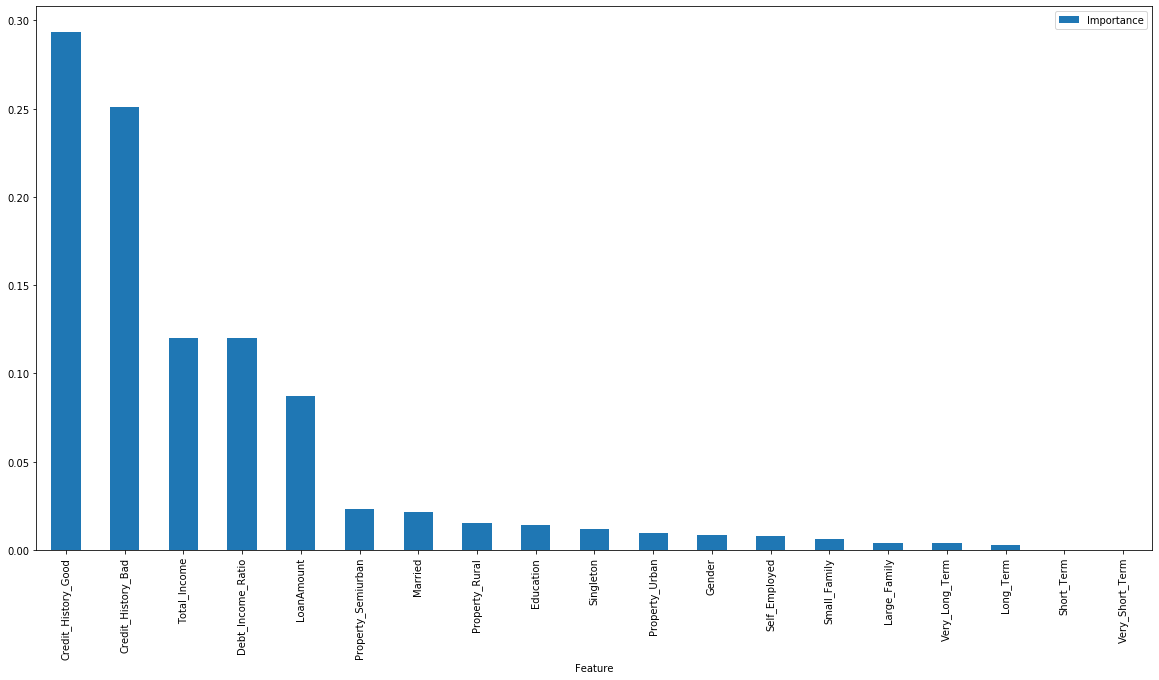

In [81]:
features.plot(kind='bar', figsize=(20, 10))

In [82]:
parameters = {'bootstrap': False,
              'min_samples_leaf': 3,
              'n_estimators': 50,
              'min_samples_split': 10,
              'max_features': 'sqrt',
              'max_depth': 6}

model = RandomForestClassifier(**parameters)
model.fit(train, ytrain)
predicted_train = model.predict(train)
true_value = ytrain
print("Train Accuracy {:.2%}".format(accuracy_score(true_value,predicted_train)))

Train Accuracy 83.22%


In [83]:
output = model.predict(test).astype(int)
output

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

APPLYING GRID SEARCH

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
# Defining RFC(random forest classifier) model hyper-parameters
rfc_models = RandomForestClassifier()
rfc_params = {'n_estimators': [50, 100,80,200],   
                      'max_depth': [10, 20,30],
                      'min_samples_leaf': [2, 4],
                      'min_samples_split': [2, 4,8]}

# Defining LR(logistic regression) model hyper-parameters
lr_models = LogisticRegression()
lr_params = {'C': [0.1, 0.01],
                     'tol': [0.001, 0.01],
                     'max_iter': [100, 200]}

dt_models = DecisionTreeClassifier()
dt_params = {}
grid = zip([rfc_models, lr_models,dt_models],[rfc_params, lr_params,dt_params])

best_clf = None
# perform grid search and select the model with best cv set scores
for model_pipeline, param in grid:
    temp = GridSearchCV(model_pipeline, param_grid=param, cv=3, n_jobs=1)
    temp.fit(train, ytrain)
    if best_clf is None:
        best_clf = temp
    else:
        if temp.best_score_ > best_clf.best_score_:
            best_clf = temp
print ("Best CV Score",best_clf.best_score_)
print ("Model Parameters",best_clf.best_params_)

Best CV Score 0.8143631436314364
Model Parameters {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


In [86]:
print ("Confusion_matrix",confusion_matrix(ytrain, best_clf.predict(train)))

Confusion_matrix [[131  61]
 [  6 416]]


In [87]:
print("Train Accuracy {:.2%}".format(accuracy_score(ytrain, best_clf.predict(train))))

Train Accuracy 89.09%


In [88]:
best_clf.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier

# Defining RFC(random forest classifier) model hyper-parameters
rfc_models = RandomForestClassifier()
rfc_params = {'n_estimators': 50,   
                      'max_depth': [25,30],
                      'min_samples_leaf': 2,
                      'min_samples_split': [4,6,3]}

# Defining LR(logistic regression) model hyper-parameters
lr_models = LogisticRegression()
lr_params = {'C': [0.1, 0.01],
                     'tol': [0.001, 0.01],
                     'max_iter': [100, 200]}

dt_models = DecisionTreeClassifier()
dt_params = { 'max_depth': [25,30],
            'min_samples_leaf': [2],
            'min_samples_split': [4,6,3]}

knn_models = KNeighborsClassifier()
knn_params = {'n_neighbors':[5,15,30,50]}

grid = zip([lr_models,dt_models,knn_models],[lr_params,dt_params,knn_params])

best_clf = None
# perform grid search and select the model with best cv set scores
for model_pipeline, param in grid:
    temp = GridSearchCV(model_pipeline, param_grid=param, cv=3, n_jobs=1)
    temp.fit(train, ytrain)
    if best_clf is None:
        best_clf = temp
    else:
        if temp.best_score_ > best_clf.best_score_:
            best_clf = temp
print ("Best CV Score",best_clf.best_score_)
print ("Model Parameters",best_clf.best_params_)
print("Best Estimator",best_clf.best_estimator_)

Best CV Score 0.8094850948509485
Model Parameters {'C': 0.1, 'max_iter': 100, 'tol': 0.001}
Best Estimator LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.001, verbose=0,
                   warm_start=False)


***Conclusion : Logistic regression is best model for loan prediction.***